%pip install keras

In [ ]:
%pip install tensorflow-gpu

In [ ]:
%pip install tensorflow

In [ ]:
%pip install matplotlib

In [ ]:
%pip install opencv-python

In [1]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2
from PIL import Image

In [2]:
print(tf.__version__)
print(tf.test.gpu_device_name())

2.11.0



In [ ]:
%cd C:/Users/emrek/Desktop/DeepLearning_Project_Updated/input/clothes

In [4]:
os.listdir('C:/Users/emrek/Desktop/DeepLearning_Project_Updated2/input/clothes/images')

['ayakkabi',
 'bluz',
 'boxer',
 'dis-giyim',
 'elbise',
 'etek',
 'gomlek',
 'kazak',
 'pantolon',
 'sort',
 'sweatshirt',
 't-shirt']

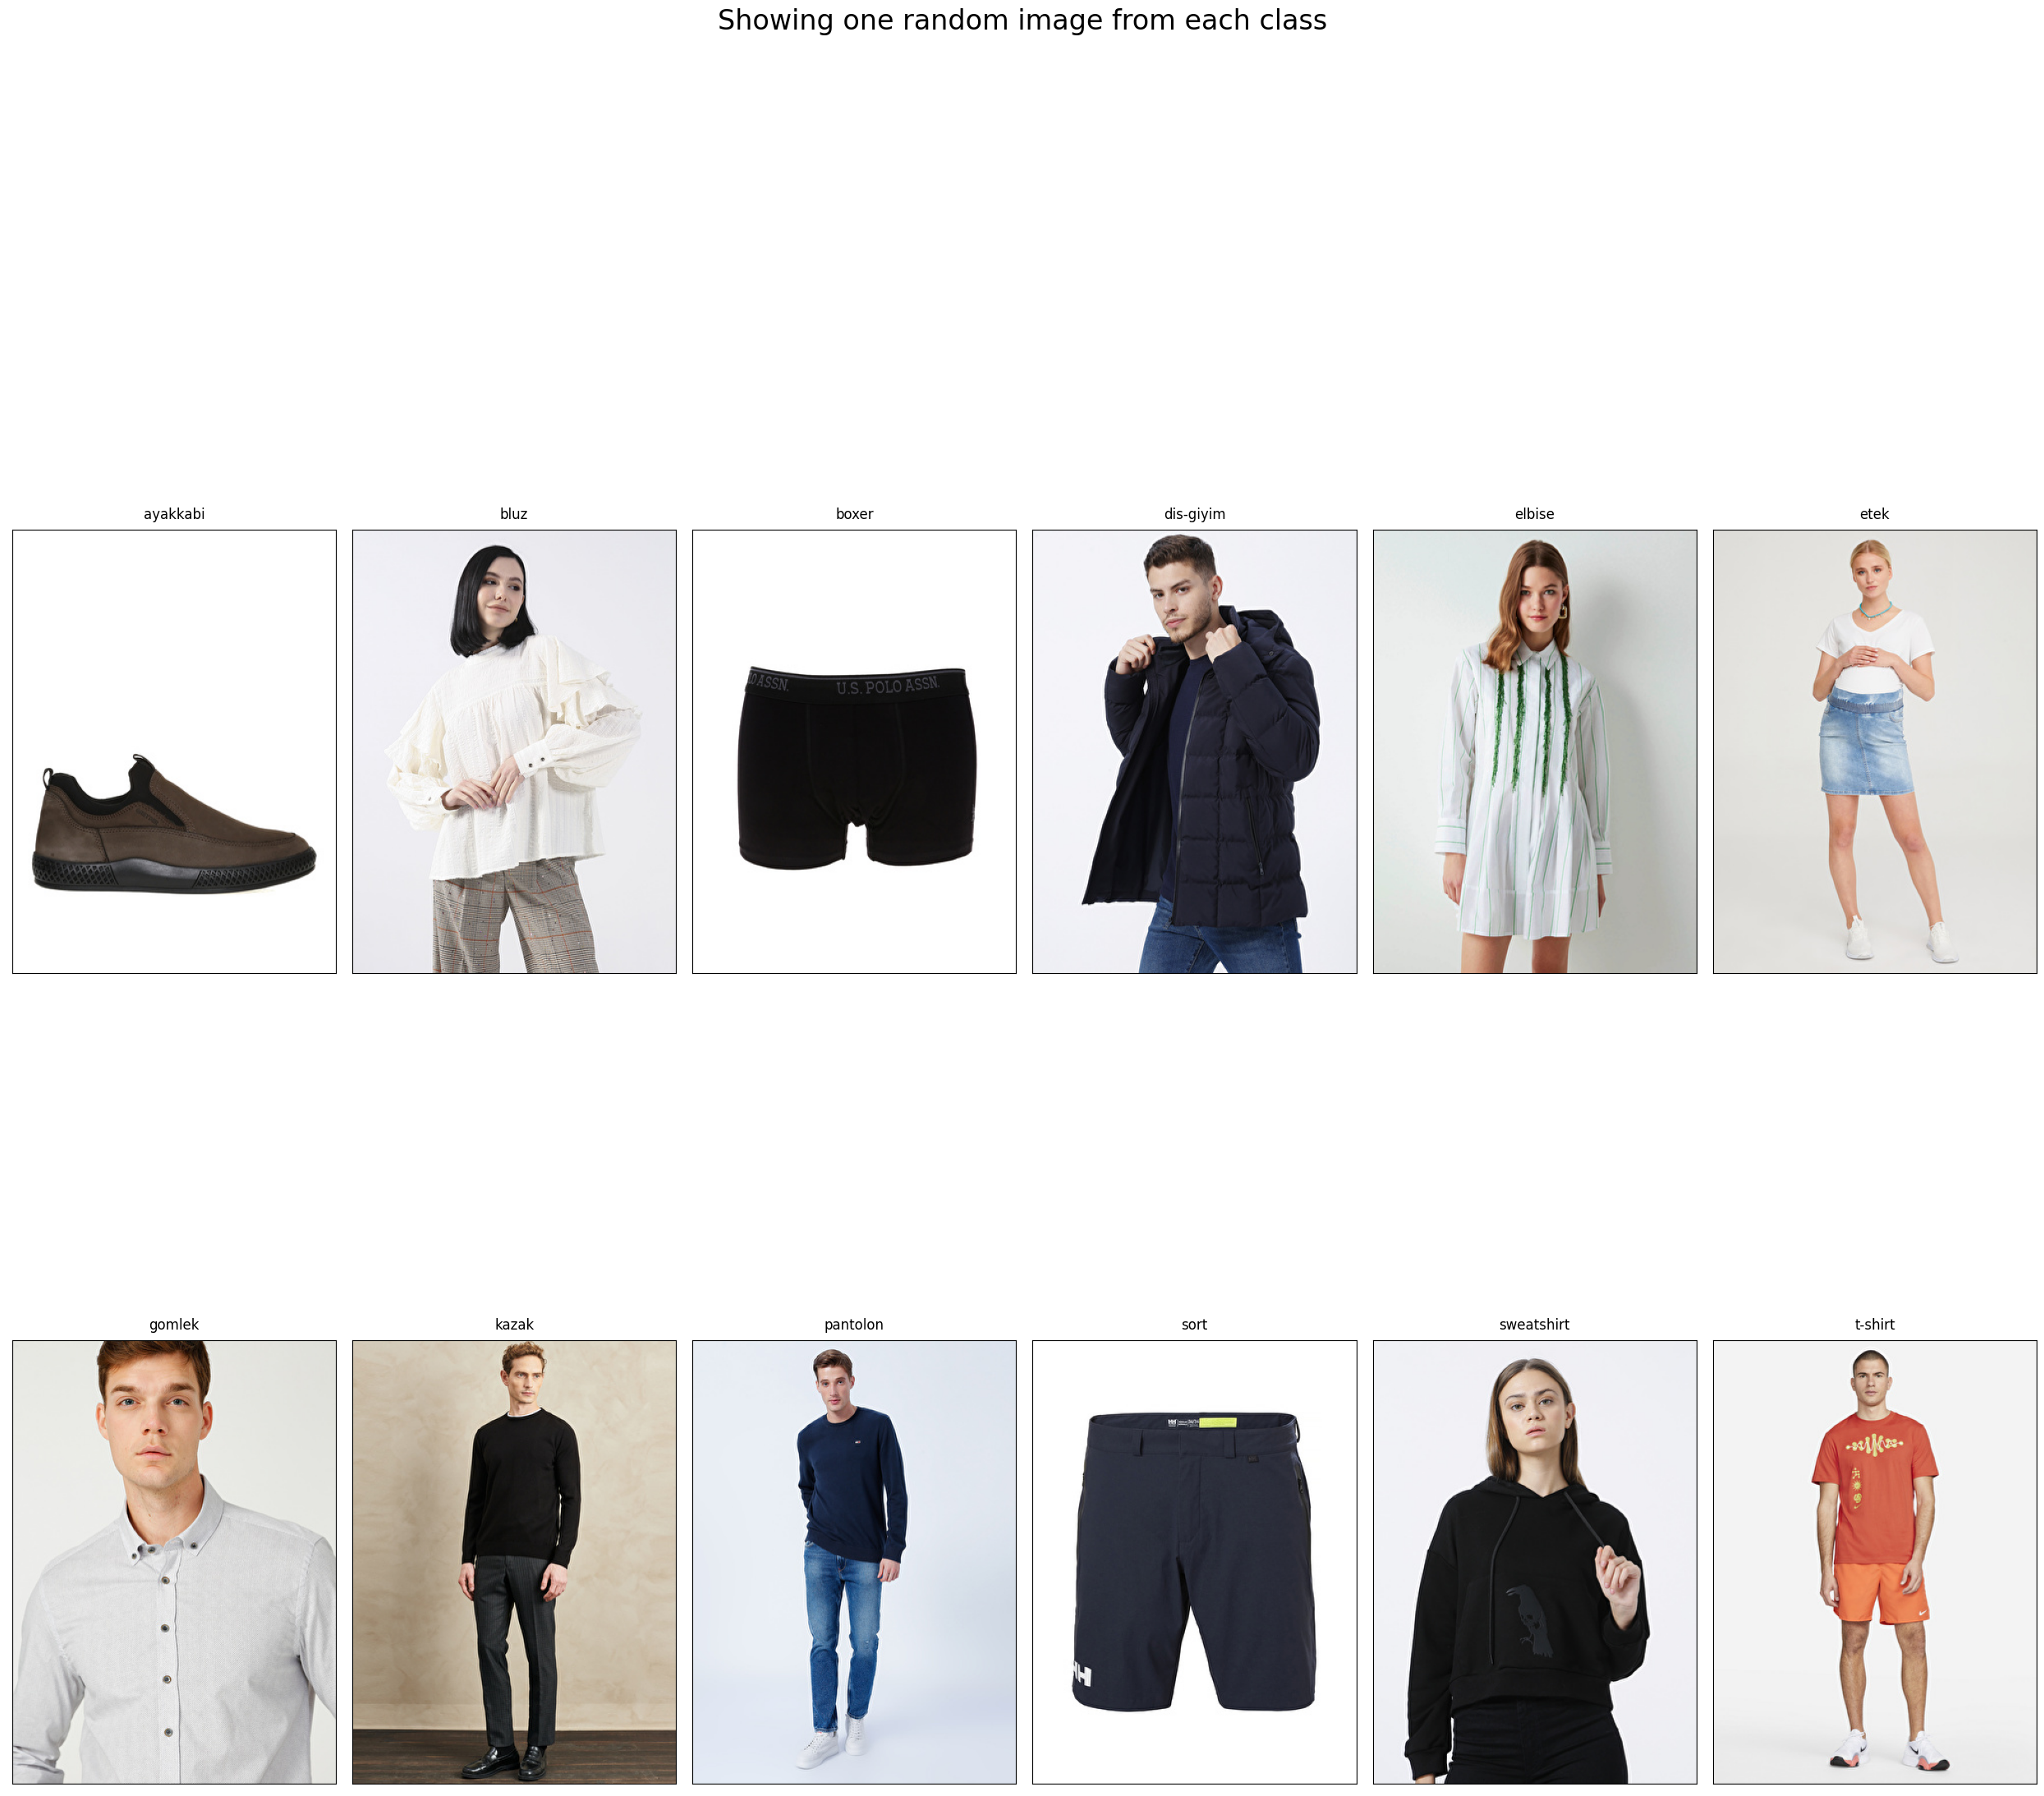

In [5]:
#Visualize random image from each of the 10 classes

rows = 2
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "C:/Users/emrek/Desktop/DeepLearning_Project_Updated2/input/clothes/images"
clothes_sorted = sorted(os.listdir(data_dir))
clothes_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      clothes_selected = clothes_sorted[clothes_id] 
      clothes_id += 1
    except:
      break
    if clothes_selected == '.DS_Store':
        continue
    clothes_selected_images = os.listdir(os.path.join(data_dir,clothes_selected)) # returns the list of all files present in each clothes category
    clothes_selected_random = np.random.choice(clothes_selected_images) # picks one clothes item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,clothes_selected, clothes_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(clothes_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()


In [ ]:
# Split the image data into train and test folders

%pip install split-folders


In [6]:
import splitfolders

input_folder = 'C:/Users/emrek/Desktop/DeepLearning_Project_Updated2/input/clothes/images/'

splitfolders.ratio(input_folder, output="C:/Users/emrek/Desktop/DeepLearning_Project_Updated2/input/clothes/splitted_images",
    seed=42, ratio = (.8,.0,.2),
    group_prefix = None
)

In [ ]:
# check the number of images inside the train, val, and test folder



In [7]:
clothes_sorted

['ayakkabi',
 'bluz',
 'boxer',
 'dis-giyim',
 'elbise',
 'etek',
 'gomlek',
 'kazak',
 'pantolon',
 'sort',
 'sweatshirt',
 't-shirt']

In [ ]:
%pip install pillow

In [ ]:
%pip install scipy

In [8]:
from PIL import Image
import PIL
import scipy
import math

In [9]:
# Helper method to create train_mini and test_mini data samples
def dataset_all(clothes_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for clothes_item in clothes_list :
    print("Copying images into",clothes_item)
    copytree(os.path.join('C:\\Users\\emrek\\Desktop\\DeepLearning_Project_Updated2\\input\\clothes\\splitted_images\\',src,clothes_item), os.path.join('C:\\Users\\emrek\\Desktop\\DeepLearning_Project_Updated2\\input\\clothes\\splitted_images\\',dest,clothes_item))

In [10]:
# picking 10 clothes items and generating separate data folders for the same
clothes_list = ['bluz', 'dis-giyim', 'pantolon', 'sweatshirt', 't-shirt',"sort","gomlek","elbise","kazak","etek"]
src_train = 'train'
dest_train = 'train_10class'
src_test = 'test'
dest_test = 'test_10class'



In [11]:
print("Creating train data folder with new classes")
dataset_all(clothes_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into bluz
Copying images into dis-giyim
Copying images into pantolon
Copying images into sweatshirt
Copying images into t-shirt
Copying images into sort
Copying images into gomlek
Copying images into elbise
Copying images into kazak
Copying images into etek


In [12]:
print("Creating test data folder with new classes")
dataset_all(clothes_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into bluz
Copying images into dis-giyim
Copying images into pantolon
Copying images into sweatshirt
Copying images into t-shirt
Copying images into sort
Copying images into gomlek
Copying images into elbise
Copying images into kazak
Copying images into etek


In [ ]:
%pip install scipy
import scipy

In [ ]:
n_classes = 10
img_width, img_height = 299, 299
train_data_dir = 'C:/Users/emrek/Desktop/DeepLearning_Project_Updated2/input/clothes/splitted_images/train_10class'
validation_data_dir = 'C:/Users/emrek/Desktop/DeepLearning_Project_Updated2/input/clothes/splitted_images/test_10class'
nb_train_samples = 10681
nb_validation_samples = 2676
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_10class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_10class.log')

history_10class = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=20,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_10class.hdf5')

In [14]:
class_map_10 = train_generator.class_indices
class_map_10

{'bluz': 0,
 'dis-giyim': 1,
 'elbise': 2,
 'etek': 3,
 'gomlek': 4,
 'kazak': 5,
 'pantolon': 6,
 'sort': 7,
 'sweatshirt': 8,
 't-shirt': 9}

In [15]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

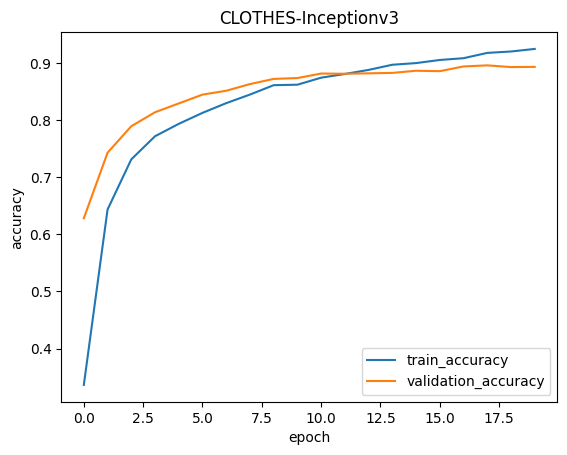

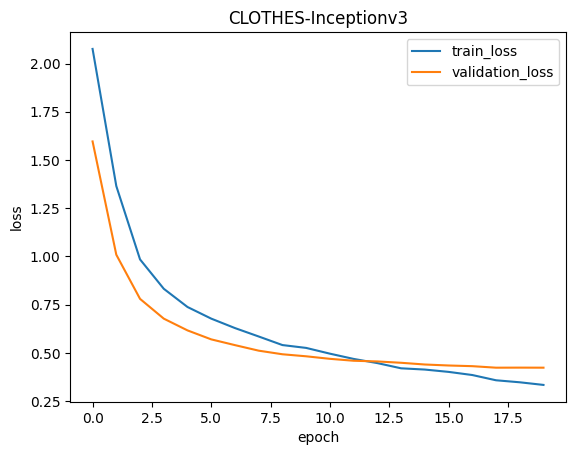

In [16]:
plot_accuracy(history_10class,'CLOTHES-Inceptionv3')
plot_loss(history_10class,'CLOTHES-Inceptionv3')

In [17]:
#Predicting classes for new images from internet using the best trained mode
# Loading the best saved model to make predictions
model_best = load_model('best_model_10class.hdf5',compile = False)

In [ ]:
#Setting compile=False and clearing the session leads to faster loading of the saved model
#Without the above addiitons, model loading was taking more than a minute!

In [18]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    clothes_list.sort()
    pred_value = clothes_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [19]:
import random
import os

1/1 [==============================] - 2s 2s/step


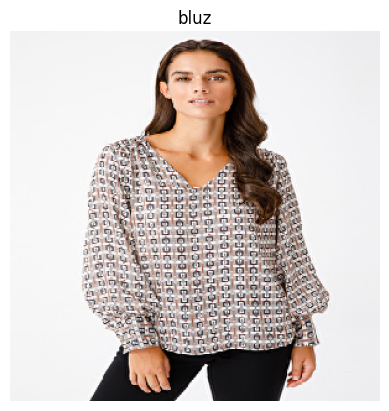

Ekol-V-Yaka---Standart-Kalıp-Vizon-Kadın-Bluz.jpg
1/1 [==============================] - 0s 155ms/step


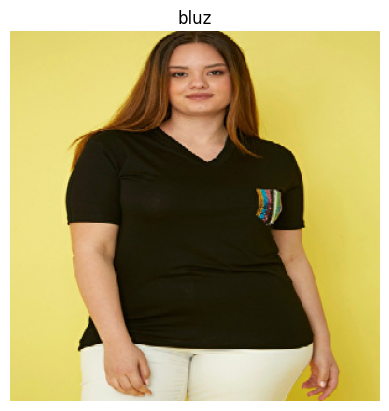

Selen-22YSL8336-V-Yaka--Normal-Kalıp-Payetli-Siyah-Kadın-Bluz.jpg
1/1 [==============================] - 0s 145ms/step


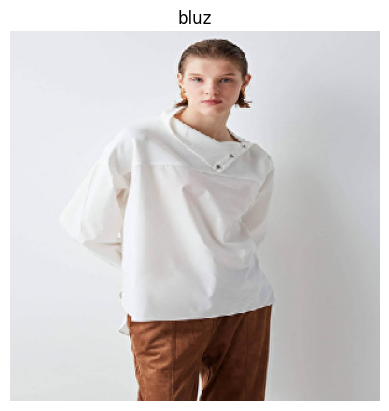

İpekyol-Dik-Yaka-Düz-Beyaz-Kadın-Bluz-IW6220006056002.jpg
1/1 [==============================] - 0s 140ms/step


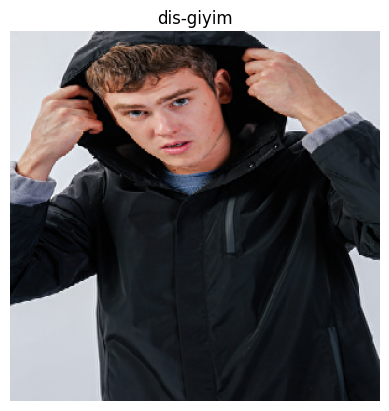

Aeropostale-Siyah-Erkek-Mont-E-THREE.jpg
1/1 [==============================] - 0s 147ms/step


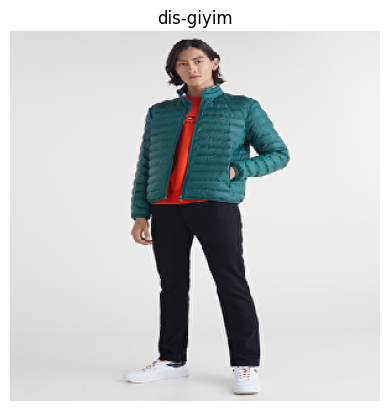

Tommy-Hilfiger-Yeşil-Erkek-Mont-MW0MW18763MBP.jpg
1/1 [==============================] - 0s 158ms/step


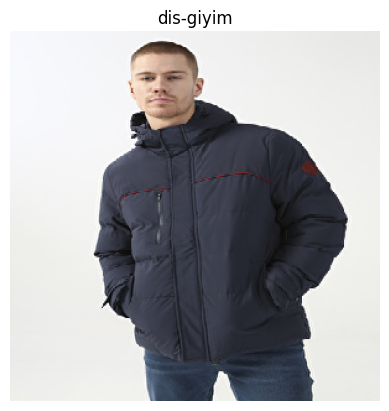

U.S.-Polo-Assn.-Lacivert-Erkek-Mont-RC-KENDRICK.jpg
1/1 [==============================] - 0s 159ms/step


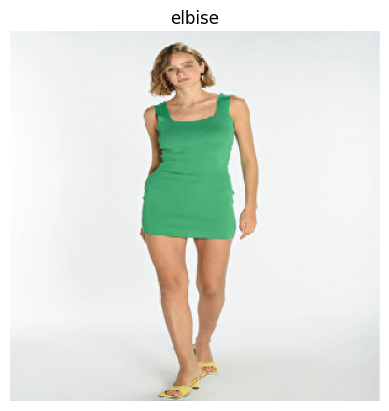

NGSTYLE-Yeşil-Kadın-Elbise-NGKSS22EL0075.jpg
1/1 [==============================] - 0s 205ms/step


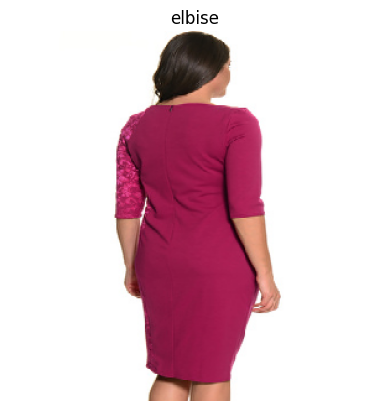

God-Diva-Vişne-Kadın-Elbise-D1997GC---BOAT-NEC.jpg
1/1 [==============================] - 0s 168ms/step


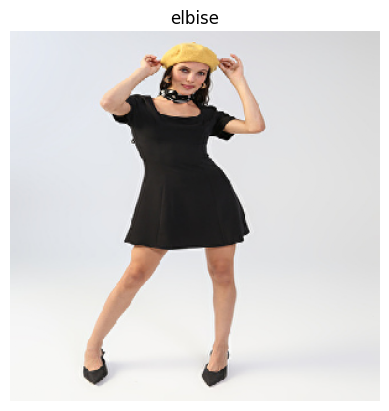

Fabrika-Kare-Yaka-Düz-Mini-Siyah-Kadın-Elbise-FENKO.jpg
1/1 [==============================] - 0s 242ms/step


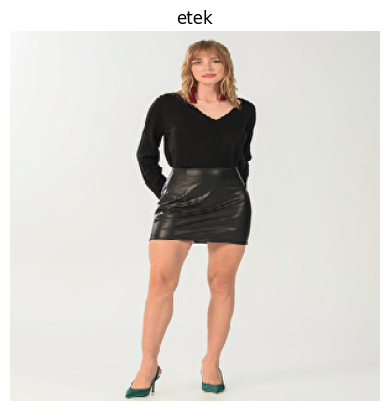

NGSTYLE-Yüksek-Bel-Siyah-Kadın-Etek-NG040575.jpg
1/1 [==============================] - 0s 154ms/step


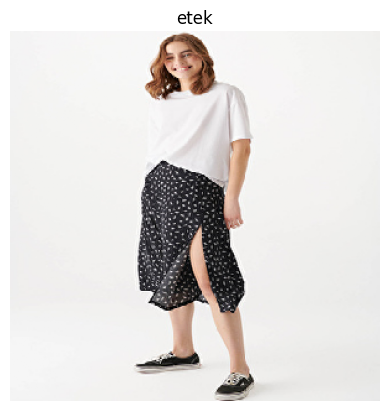

Mavi-Normal-Bel-Ekru-Kadın-Etek-M131144-81530.jpg
1/1 [==============================] - 0s 188ms/step


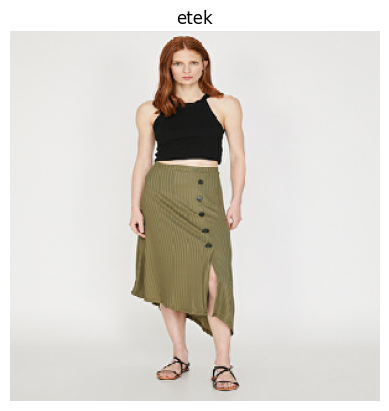

Koton-Düğme-Detaylı-Asimetri-Haki-Kadın-Etek.jpg
1/1 [==============================] - 0s 231ms/step


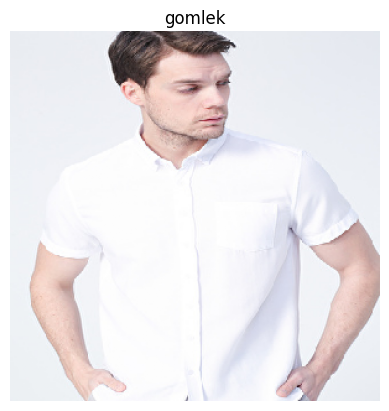

Fabrika-Comfort-CM-Ryan-D-996-Düğmeli--Regular-Fit--Armürlü-Beyaz-Erkek-Gömlek.jpg
1/1 [==============================] - 0s 135ms/step


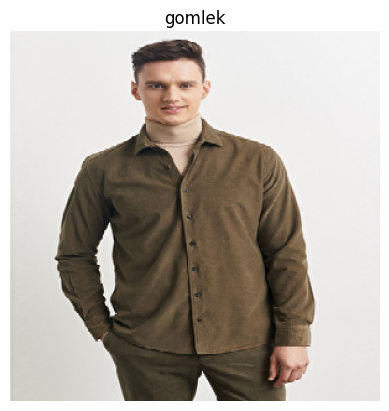

Altınyıldız-Classics-Düğmeli-Yaka-Haki-Erkek-Gömlek-4A2023100026.jpg
1/1 [==============================] - 0s 231ms/step


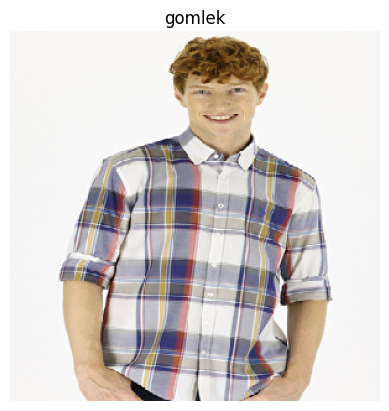

U.S.-Polo-Assn.-Port-Düğmeli--Regular-Fit-Kareli-Kırmızı-Erkek-Gömlek.jpg
1/1 [==============================] - 0s 140ms/step


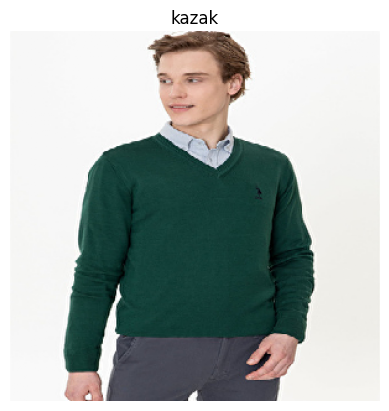

U.S.-Polo-Assn.-Bisiklet-Yaka-Yeşil-Erkek-Kazak-GTD02-GLBSK21.jpg
1/1 [==============================] - 0s 279ms/step


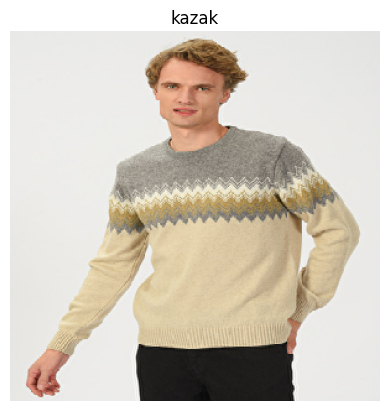

People-By-Fabrika-Bisiklet-Yaka-Jakarlı-Gri-Melanj-Erkek-Kazak-23tr48.jpg
1/1 [==============================] - 0s 187ms/step


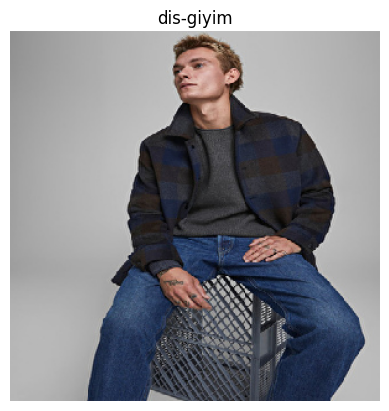

Jack-&-Jones-12179861_Jprblucarlos-Knit-Crew-Nec-O-Yaka-Uzun-Kollu--Normal-Kalıp-Düz-Koyu-Mavi-Erkek-Kazak.jpg
1/1 [==============================] - 0s 253ms/step


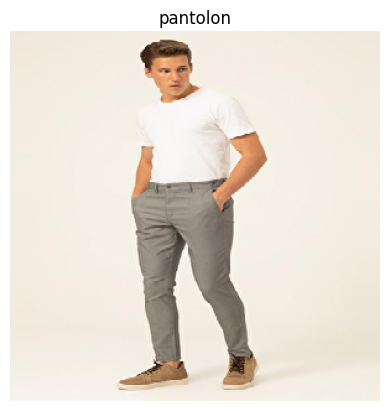

Süvari-Normal-Bel-Normal-Paça-Slim-Fit-Siyah-Erkek-Pantolon-PN2020500493.jpg
1/1 [==============================] - 0s 141ms/step


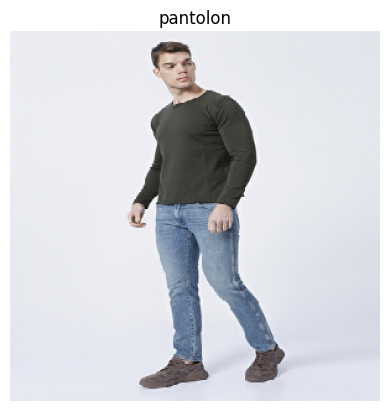

Wrangler-Düşük-Bel-Slim-Fit-Mavi-Erkek-Denim-Pantolon-W18S5936A-400_Larston.jpg
1/1 [==============================] - 0s 272ms/step


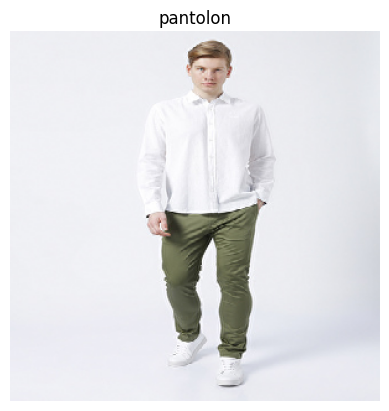

Wrangler-Normal-Bel-Slim-Fit-Haki-Erkek-Chino-Pantolon-W221306801_-chino-pantolon.jpg
1/1 [==============================] - 0s 145ms/step


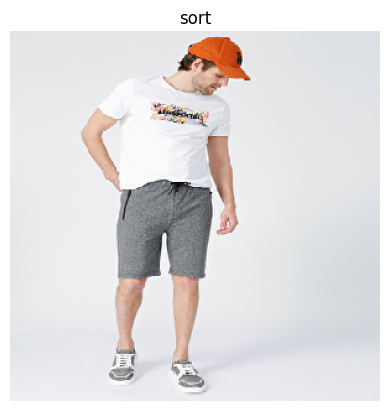

Aeropostale-Düz-Gri-Erkek-Şort.jpg
1/1 [==============================] - 0s 235ms/step


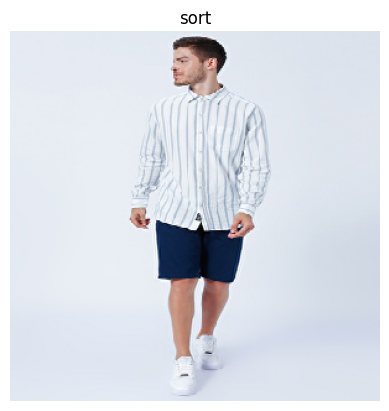

Lee-Cooper-Slim-Fit-Lacivert-Erkek-Şort-222-LCM-221010-DORY.jpg
1/1 [==============================] - 0s 184ms/step


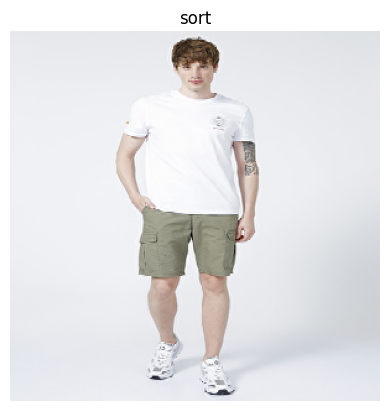

Lee-Yeşil-Kargo-Şort.jpg
1/1 [==============================] - 0s 217ms/step


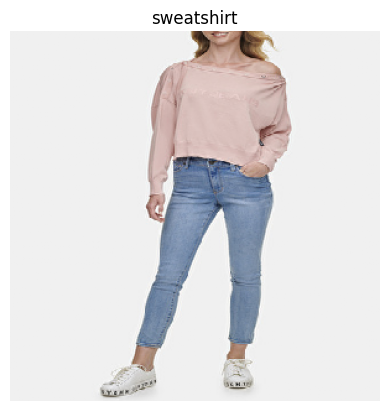

Dkny-Jeans-Uzun-Kollu-Logolu-Sweatshirt.jpg
1/1 [==============================] - 0s 146ms/step


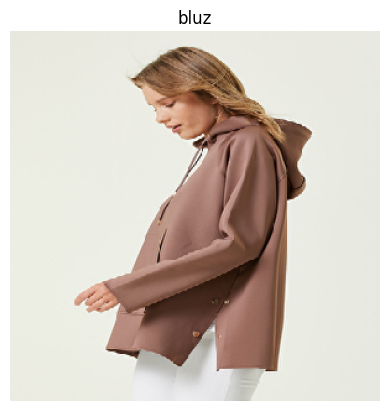

Network-Kapüşon-Yaka-Vizon-Kadın-Sweatshırt-1084836.jpg
1/1 [==============================] - 0s 178ms/step


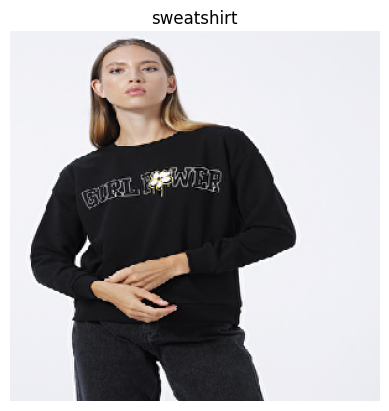

Fashion-Friends-Baskılı-Siyah-Kadın-Sweatshırt-22K0573K1.jpg
1/1 [==============================] - 0s 247ms/step


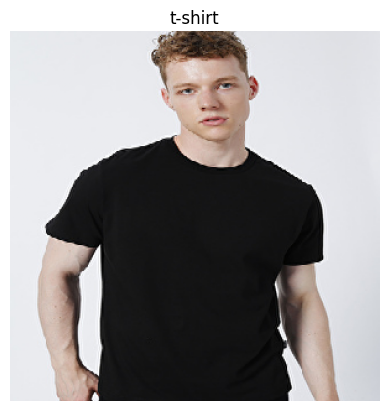

Wrangler-W221014001-Bisiklet-Yaka--Regular-Fit--Siyah-Erkek-T-Shirt.jpg
1/1 [==============================] - 0s 276ms/step


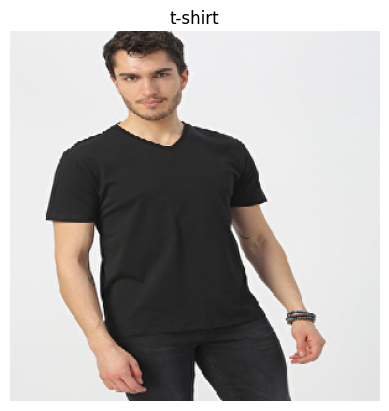

Limon-Siyah-T-Shirt.jpg
1/1 [==============================] - 0s 269ms/step


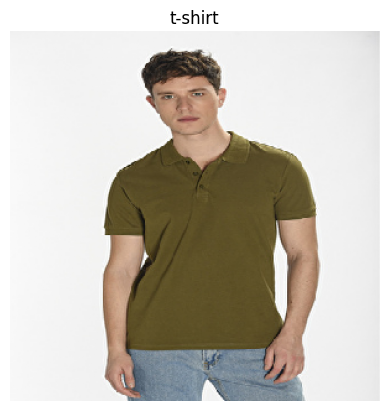

People-By-Fabrika-Haki-Erkek-T-Shirt-PFESS22TS0001.jpg


In [20]:
category = ["bluz","dis-giyim","elbise","etek","gomlek","kazak","pantolon","sort","sweatshirt","t-shirt"]
i= 0
images = []

for x in category:
    while i < 3:
        path="C:\\Users\\emrek\\Desktop\\DeepLearning_Project_Updated\\input\\clothes\\splitted_images\\test_10class\\"+x+"\\"
        files=os.listdir(path)
        d=random.choice(files)
        #os.startfile(path+d)
        rimg=path+d
        images.append(rimg)
        predict_class(model_best, images, True)
        print(d)
        images.pop(0)
        i+=1
    i=0